In [211]:
# !pip install matplotlib

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [213]:
# 1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df[0:6]

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
5,6,셔츠,Clothing,5,8000,1049,1970-01-29,2024-01-09 8:49,대한민국,0.09


In [214]:
# 2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
df.isnull().sum()

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64

In [215]:
df['DiscountRate'] = df['DiscountRate'].fillna(df['DiscountRate'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  120 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [216]:
# 3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.
df.dtypes

OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object

In [217]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [218]:
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [219]:
# 1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
#        - 매출액 = `Quantity` * `Price`
df['TotalRevenue'] = df['Quantity']/df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,0.000135
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,0.000250
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,0.000500
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,0.000125
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,0.000115
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20,0.000030
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,0.000098
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,0.000030
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,0.000047


In [220]:
# 2. 월별 총 매출액을 집계하여 시각화하세요.
#        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
df = df.set_index('OrderDate')
data_month = df.resample(rule='M')['Price'].sum()
print(data_month)

OrderDate
2023-10-31    155000
2023-11-30    284000
2023-12-31    289000
2024-01-31    333000
2024-02-29    175000
2024-03-31    223000
2024-04-30    170000
2024-05-31    261000
2024-06-30    423000
2024-07-31    293000
2024-08-31    189000
2024-09-30    242000
2024-10-31     38000
Freq: ME, Name: Price, dtype: int64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32212\3935672590.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_month = df.resample(rule='M')['Price'].sum()


In [221]:
# 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
group_data_1 = df.groupby('Category')
a = group_data_1['Price'].max()
b = a.sort_values(ascending=False).head(3)
print(b)

Category
Books          50000
Electronics    50000
Beauty         49000
Name: Price, dtype: int64


In [222]:
# 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
group_data_2 = df.groupby('Country')
data24 = group_data_2['Price'].sum()
data24 = data24.sort_values(ascending=False).head(5)
for country in data24.index:
    print(country)

독일
미국
중국
일본
대한민국


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [223]:
 # 1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
group_data_3 = df.groupby('CustomerID')
data31 = group_data_3['Price'].sum()
data31 = data31.sort_values(ascending=False).head(5)
for people in data31.index:
    print(people)

1496
1007
1038
1141
1508


In [224]:
# 2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
data32 = df['CustomerID'].value_counts()
data32 = data32.sort_values(ascending=False).head(5)
for customer in data32.index:
    print(customer)

1206
1278
1496
1007
1673


In [225]:
# 3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        # - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.
df['Age'] = np.random.randint(0, 100, size=120)

In [226]:
data33 = df['Age'].value_counts()
data34 = df.groupby('Age')
data35 = data34['Category'].max()
print(data35)

Age
0          Beauty
1          Beauty
3     Electronics
5          Sports
7        Clothing
         ...     
94         Sports
95         Sports
96          Books
97          Books
98    Electronics
Name: Category, Length: 73, dtype: object


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [227]:
# 1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
data41 = df['Product'].value_counts()
data41 = data41.sort_values(ascending=False).head(5)
for product in data41.index:
    print(product)

역사책
셔츠
립스틱
소설
화장품


In [228]:
# 2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
group_data_4 = df.groupby('Category')
data42 = group_data_4['Price'].sum()
data42 = data41.sort_values(ascending=False).head(1)
for product in data42.index:
    print(product)

역사책


In [229]:
# 3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.
group_data_41 = df.groupby('Product')
data43 = group_data_41['Quantity'].mean()
data43 = data43.sort_values(ascending=False).head(3)
for product1 in data43.index:
    print(product1)

주스
자기계발
요가매트


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

In [230]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib


font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

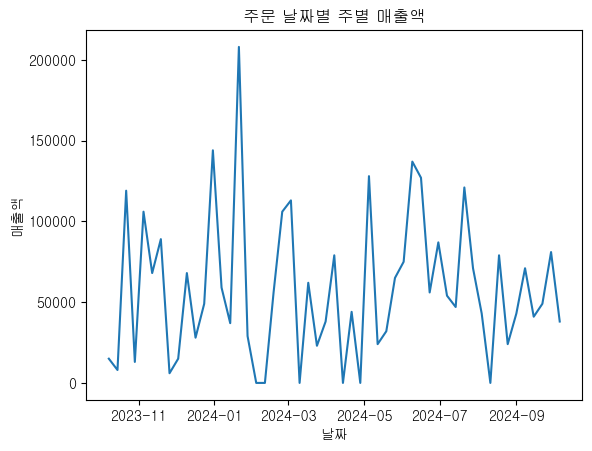

In [231]:
# 1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
data_month = df.resample(rule='W')['Price'].sum()
plt.plot(data_month.index, data_month.values)
plt.title('주문 날짜별 주별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.show()

----------

In [232]:
df_1 = df.reset_index()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32212\1046451839.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_52month = df_1.resample(rule='M')['Price'].sum()


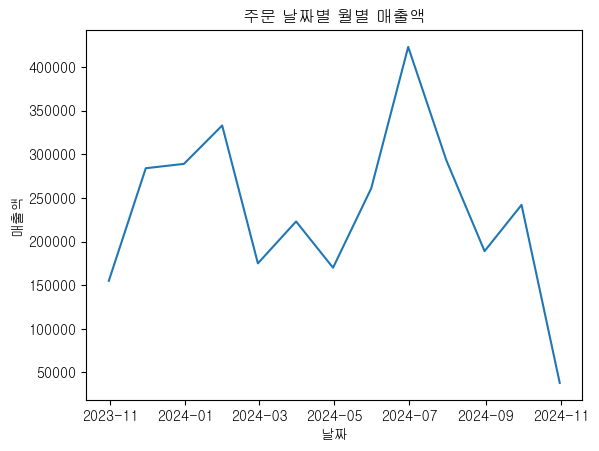

In [233]:
# 2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
data52 = df_1[(df_1['OrderDate'] >= '2024-1') & (df_1['OrderDate'] <= '2024-6')]
df_1 = df_1.set_index('OrderDate')
data_52month = df_1.resample(rule='M')['Price'].sum()
plt.plot(data_52month.index, data_52month.values)
plt.title('주문 날짜별 월별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.show()

In [234]:
df_1 = df.reset_index()

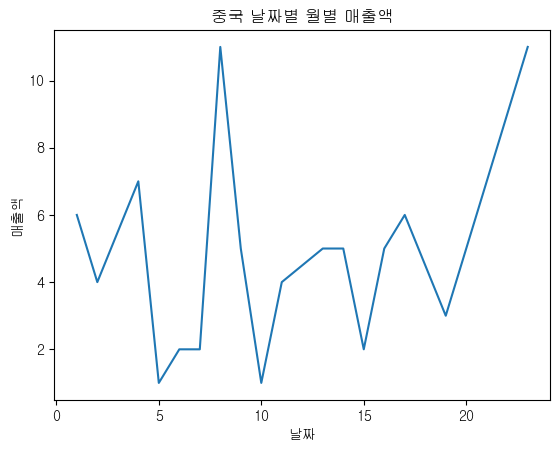

In [235]:
# 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.
df_1['Hour'] = df_1['OrderDate'].dt.hour
china = df_1[df_1['Country'] == '중국']
group_data_53 = china.groupby('Hour')['Quantity'].sum().sort_index(ascending=False)
plt.plot(group_data_53.index, group_data_53.values)
plt.title('중국 날짜별 월별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [238]:
# 1. 고객의 **재구매율**을 분석하세요. - 재구매율 = 한 고객이 여러 번 주문한 비율
a1 = df_1['CustomerID'].value_counts()
a0 = a1[a1 >= 2].count()
data61 = a0 / (df_1['CustomerID'].count())
print(data61)

0.075


In [241]:
# 2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.
data_group = df_1.groupby('Category')['DiscountRate']
data62 = data_group.max()
data623 = data62.max()
data06 = data62[data62 == data623].index[0]
data621 = df_1[df_1['Category'] == data06]['Price'].sum()
print(data621)

402000
